## Do Imports

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import math
import pprint
from __future__ import division
from __future__ import print_function
from datetime import datetime
import matplotlib.pyplot as plt
import os
from fractions import Fraction 
import scipy.odr.odrpack as odrpack
import time
from bisect import bisect_left
import matplotlib.dates as md

## Define functions for the analytical model

In [2]:
def calcMathisModel_outMBitsPerSec(packetloss, MSS, RTT, C=np.sqrt(3/2)):
    '''
    Returns the result of mathis model in Bits/s.
    It does work with np.arrays.
    '''
    outVal = (MSS/RTT)*C/np.sqrt(packetloss)
    # convert inf vals to nan
    outVal = outVal*np.isfinite(outVal)
    return outVal


## Import raw data

In [3]:
# read our raw data
data_router = pd.read_pickle("raw_data_routers/raw_router_CERN_to_RAL-PIC-TRIUMF_highres.pkl")
data_perfSonar_RAL = pd.read_pickle("raw_data_routers/raw_toolkit_CERN_to_RAL_sorted.pkl")
data_perfSonar_PIC = pd.read_pickle("raw_data_routers/raw_toolkit_CERN_to_PIC_sorted.pkl")
data_perfSonar_TRIUMF = pd.read_pickle("raw_data_routers/raw_toolkit_CERN_to_TRIUMF_sorted.pkl")

data_router.axes[1]
#data_perfSonar_RAL['out'].axes[1]

Index([u'throughput_ES-PIC_router_1_in', u'throughput_ES-PIC_router_1_out',
       u'throughput_UK-RAL_router_1_in', u'throughput_UK-RAL_router_1_out',
       u'throughput_UK-RAL_router_2_in', u'throughput_UK-RAL_router_2_out',
       u'throughput_CA-TRIUMF_router_1_in',
       u'throughput_CA-TRIUMF_router_1_out'],
      dtype='object')

## TRIUMF plotting

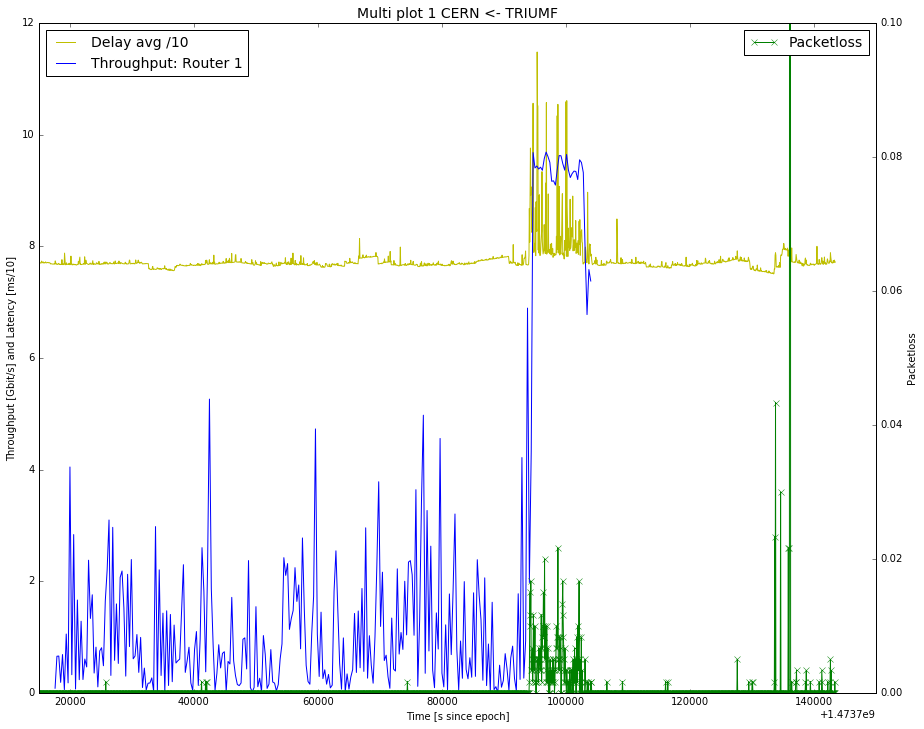

In [5]:
src = "CERN"
dest = "TRIUMF"
direction = "in"

dirMarker = " <- "
if direction == "out":
    dirMarker = " -> "
title = "Multi plot 1 "+src+dirMarker+dest +""
fname = title
# plot the data we got
fig, ax1 = plt.subplots()
fig.set_size_inches(15,12)
fig.set_dpi(300)
plt.title(title,fontsize=14)



ax1.plot(np.array(data_perfSonar_TRIUMF[direction].axes[0]), data_perfSonar_TRIUMF[direction]["delay_avg"]/10,
         'y', label=r'Delay avg /10')
ax1.plot(np.array(data_router.axes[0]), data_router["throughput_CA-TRIUMF_router_1_"+direction]/1e9,
         'b', label=r'Throughput: Router 1')
ax1.set_ylabel("Throughput [Gbit/s] and Latency [ms/10]")
ax1.set_xlabel("Time [s since epoch]")

ax1.legend(loc='upper left',fontsize=14)

# make second axis
ax2 = ax1.twinx()
ax2.plot(np.array(data_perfSonar_TRIUMF[direction].axes[0]), data_perfSonar_TRIUMF[direction]["packet_loss"],
         'gx-', label=r'Packetloss')

ax2.set_ylabel("Packetloss")
ax2.legend(loc='upper right',fontsize=14)

ax1.set_ylim([0, 12])
ax2.set_ylim([0, 0.1])
plt.xlim([1.473715*1e9, 1.47385*1e9])

#plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )

#plt.savefig('plots/router_multi_plots_2016-09-14/'+ fname +'.png', format='PNG', dpi=300)

plt.show()

## PIC plotting

In [9]:
# combine data
src = "CERN"
dest = "PIC"
timeframe = [1.47356*1e9, 1.47380*1e9]
direction = "out"
dirMarker = " <- "
if direction == "out":
    dirMarker = " -> "
title = "Scater plot 1 "+src+dirMarker+dest+ "\nTime: "+str(timeframe[0])+" to "+str(timeframe[1])
fname = title




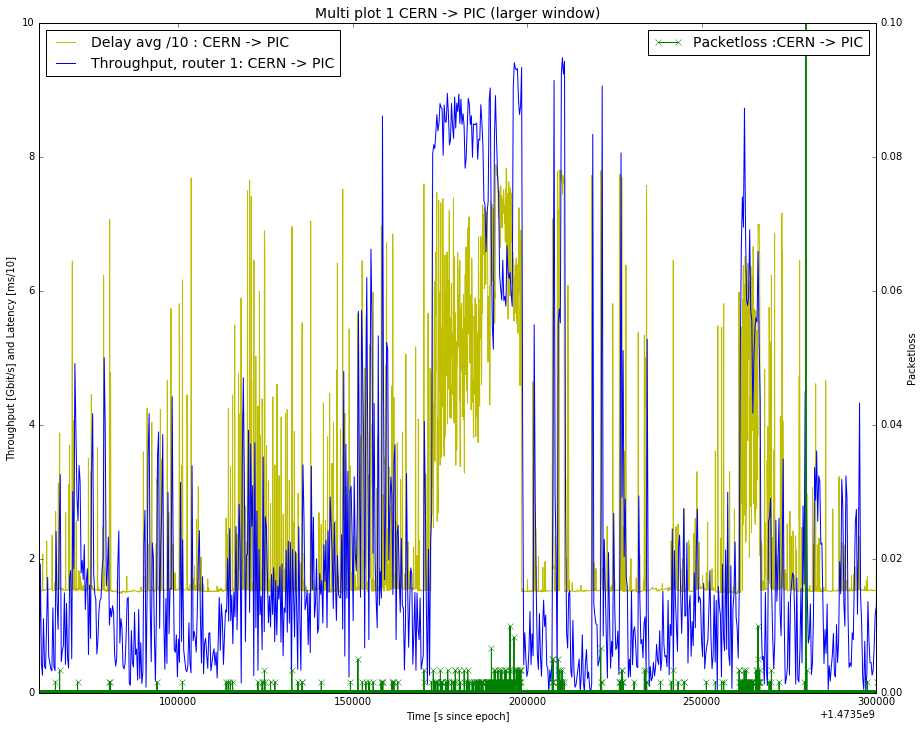

In [6]:
src = "CERN"
dest = "PIC"
direction = "out"
dirMarker = " <- "
if direction == "out":
    dirMarker = " -> "
title = "Multi plot 1 "+src+dirMarker+dest +" (larger window)"
fname = title
# plot the data we got
fig, ax1 = plt.subplots()
fig.set_size_inches(15,12)
fig.set_dpi(300)
plt.title(title,fontsize=14)


ax1.plot(np.array(data_perfSonar_PIC[direction].axes[0]), data_perfSonar_PIC[direction]["delay_avg"]/10,
         'y', label=r'Delay avg /10 : '+src+dirMarker+dest)
ax1.plot(np.array(data_router.axes[0]), data_router["throughput_ES-PIC_router_1_"+direction]/1e9,
         'b', label=r'Throughput, router 1: '+src+dirMarker+dest)
ax1.set_ylabel("Throughput [Gbit/s] and Latency [ms/10]")
ax1.set_xlabel("Time [s since epoch]")

ax1.legend(loc='upper left',fontsize=14)

# make second axis
ax2 = ax1.twinx()
ax2.plot(np.array(data_perfSonar_PIC[direction].axes[0]), data_perfSonar_PIC[direction]["packet_loss"],
         'gx-', label=r'Packetloss :'+src+dirMarker+dest)

ax2.set_ylabel("Packetloss")
ax2.legend(loc='upper right',fontsize=14)
ax2.set_ylim([0, 0.1])

plt.xlim([1.47356*1e9, 1.47380*1e9])

#plt.savefig('plots/router_multi_plots_2016-09-14/'+ fname +'.png', format='PNG', dpi=300)

plt.show()

## RAL plotting

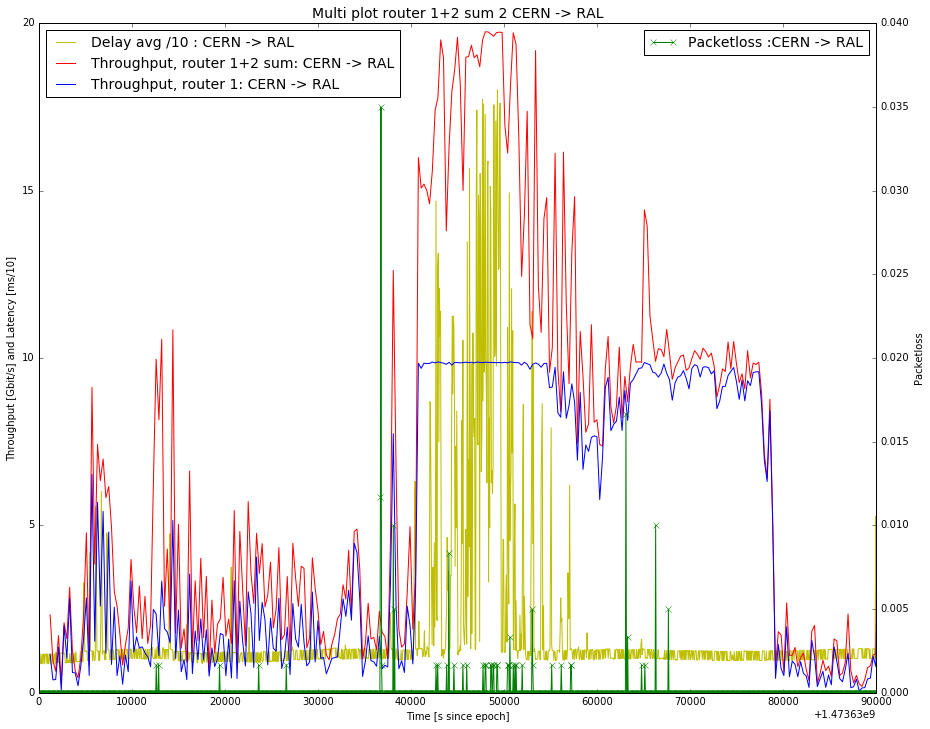

In [7]:
src = "CERN"
dest = "RAL"
title = "Multi plot router 1+2 sum 2 "+src+" -> "+dest
fname = title
# plot the data we got
fig, ax1 = plt.subplots()
fig.set_size_inches(15,12)
fig.set_dpi(300)
plt.title(title,fontsize=14)


ax1.plot(np.array(data_perfSonar_RAL['out'].axes[0]), data_perfSonar_RAL['out']["delay_avg"]/10,
         'y', label=r'Delay avg /10 : '+src+' -> '+dest)
ax1.plot(np.array(data_router.axes[0]), (data_router["throughput_UK-RAL_router_1_out"]+data_router["throughput_UK-RAL_router_2_out"])/1e9,
         'r', label=r'Throughput, router 1+2 sum: '+src+' -> '+dest)
ax1.plot(np.array(data_router.axes[0]), data_router["throughput_UK-RAL_router_1_out"]/1e9,
         'b', label=r'Throughput, router 1: '+src+' -> '+dest)
#ax1.plot(np.array(data_router.axes[0]), data_router["throughput_UK-RAL_router_2_out"]/1e9,
#         'r', label=r'Throughput, router 2: '+src+' -> '+dest)
ax1.set_ylabel("Throughput [Gbit/s] and Latency [ms/10]")
ax1.set_xlabel("Time [s since epoch]")

ax1.legend(loc='upper left',fontsize=14)

# make second axis
ax2 = ax1.twinx()
ax2.plot(np.array(data_perfSonar_RAL['out'].axes[0]), data_perfSonar_RAL['out']["packet_loss"],
         'gx-', label=r'Packetloss :'+src+' -> '+dest)

ax2.set_ylabel("Packetloss")
ax2.legend(loc='upper right',fontsize=14)

plt.xlim([1.47363*1e9, 1.47372*1e9])

#plt.savefig('plots/router_multi_plots_2016-09-14/'+ fname +'.png', format='PNG', dpi=300)

plt.show()

In [8]:
data_perfSonar_TRIUMF[direction]["delay_avg"]

1473843432    76.586500
1473843376    76.373833
1473843319    76.468000
1473843256    76.568667
1473843199    76.892333
1473843142    76.840500
1473843080    77.049000
1473843020    76.854167
1473842962    78.522371
1473842900    76.719833
1473842841    76.629333
1473842779    76.439500
1473842716    76.498167
1473842654    76.568000
1473842593    76.709349
1473842531    77.716333
1473842474    77.024040
1473842415    76.896000
1473842359    76.738167
1473842297    76.524415
1473842238    77.047579
1473842181    77.173000
1473842119    76.832554
1473842057    77.268114
1473842000    77.790833
1473841935    76.861667
1473841874    77.907346
1473841816    77.356333
1473841753    77.088333
1473841693    76.615500
                ...    
1473553746    76.498833
1473553690    76.141833
1473553624    76.178000
1473553563    76.117167
1473553501    76.200000
1473553445    76.294000
1473553382    76.254333
1473553322    76.241167
1473553267    76.283333
1473553205    76.418167
1473553141    76